# Product Analysis for Online Retailing

**Abstract:** This project is based on a transnational dataset which contains all the transactions occurring between 1/12/2010 and 9/12/2011 for a UK-based and registered non-store online retail. Through data analysis and modeling,  this project will focus on customer segmentation as well as predictive sales that will help the retailer make strategic decisions to increase its sales and profits.  

## 1. Problem Statement & Business Case

The company mainly sells unique all-occasion gifts and many of the customers of the company are wholesalers. The customers are located in various countries. By looking at the historical data, we would like to identify consumer patterns of this retailer and make predictions of future sales.

One of the problems to be solved through this project is **customer segment**. We would like to know more about customer profiles and similarities among the customers that help with better targeting current and potential customers in the future. Questions to be answered include: 1. Who are the major customers and where are they? 2. Any similarities among the customers with regard to geographical locations, favorable products, purchasing patterns and so on? Customer segment is an **unsupervised classification** problem in nature. In this exercise the hypothesis is that there are similarities among all the customers. By looking at their countries, products purchased as well as quantities and unit prices, purchasing dates, we would classify the customers into several groups.

Another problem we would like to solve is **predictive sales** of this retailer. By diving into historical sales data, we would expect to answer the following questions: 1. What are the most popular and least popular products? 3. When do most sales take place? 4. Any trends in terms of sales in the one year and nine month period? 5. Does product pricing affect sales and by how much? 5. What do predictive sales look like? We will focus on individual products. The underlying assumption is that past sales would help to predict future sales. Using **regression** models, we will find out contributing factors and degrees of various as related to product sales. 

## 2. Data Wrangling

### 2.1 Data Collection

In [1]:
#Load python packages
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

color = sns.color_palette()

In [2]:
df = pd.read_excel('G:\My Drive\Jun\Mechine Learning\Data Science\Capstone Two\Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Description of columns

| Column | Description |
| :- | :- |
| InvoiceNo | Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cacellation. |
| StockCode | Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. |
| Description | Product (item) name. Nominal. |
| Quantity | The quantities of each product (item) per transaction. Numeric. |
| InvoiceDate | Invoice Date and time. Numeric, the day and time when each transaction was generated. |
| UnitPrice | Unit price. Numeric. Product price per unit in sterling. |
| CustomerID | Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. |
| Country | Country name. Nominal, the name of the country where each customer resides. |


### 2.2 Data Cleaning

In [ ]:
df.info()

In [ ]:
# Print the range of values using the aggregate function. 
df.describe().T

#### 2.2.1 Missing values

In [3]:
nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
CustomerID,0.249267
Description,0.002683


Two variables have missing values. Let's look at them individually and think about filling methods. 

**Description**: each product has a unique StockCode and description. Therefore it is possible to fill missing discription using StockCode. Bear in mind that in later analysis, only one of StockCode and Description will be used in analysis and modelling, because they are highly correlated. 

In [4]:
df['Description'] = df.groupby(["StockCode"])['Description'].transform(lambda x: x.fillna(x.mode()))

nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
CustomerID,0.249267
Description,0.002683


**CustomerID**: each transaction record involves an InvoiceNo, CustomerID and Country. Therefore we might be able to fill in missing CustomerID using InvoiceID and Country. 

In [5]:
df_Non_Null = df[df['CustomerID'].isnull()==False].copy()
print(df_Non_Null.shape)

df_Null = df[df['CustomerID'].isnull()==True].copy()
print(df_Null.shape)

df_join = df_Non_Null.merge(df_Null, on = 'InvoiceNo', how = 'inner')
df_join.head()

(406829, 8)
(135080, 8)


,InvoiceNo,StockCode_x,Description_x,Quantity_x,InvoiceDate_x,UnitPrice_x,CustomerID_x,Country_x,StockCode_y,Description_y,Quantity_y,InvoiceDate_y,UnitPrice_y,CustomerID_y,Country_y


In [6]:
# since we were not able to find appropriate ways to fill the missing data, we will drop the missing values.
df = df.dropna(subset=['Description', 'CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
# set the data types: all columncs look good except that "CustomerID" should be string.
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


#### 2.2.2 Duplicates

In [ ]:
# Is there any duplicates?
duplicated = df[df.duplicated()]
duplicated.head(5)

# Does it related to data type? Except InvoiceNo and Quantity, all other columns are string type.
# The results show that those are not really duplicate. They are different products shown on the
# results, meaning that one customer purchased various of products at one time. They should be 
# kept in the data for analysis. 
# subset=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], keep=False

In [ ]:
# df.drop_duplicates(inplace=True)
# df.info()

# This code will delete rows and leave me only 4837 rows. Sth went wrong. 

#### 2.2.3 Anomalies and Outliers

In [ ]:
df.describe()

The distribution of Quantity and UnitPrice is highly skewed. While most purchases are about small Quantity and small UnitPrice, there are a few extra large amount Quantity and UnitPrice.

In [ ]:
# price distribution of goods with UnitPrice larger than 50:
sns.distplot(df[df['UnitPrice']>50]['UnitPrice'], kde=False, rug=True)

In [ ]:
# Check out description of products, which cost more than 50. 
df[df['UnitPrice']>50]['Description'].unique().tolist()

 "Manual", "POSTAGE" and "DOTCOM POSTAGE" do not look like normal goods. Double check on this:

In [ ]:
df[df['Description']=='Manual']

In [ ]:
df[df['Description']=='POSTAGE']

In [ ]:
df[df['Description']=='DOTCOM POSTAGE']

Thus, "Manual" goods are items with missing or misplaced StockCode. They do not providd useful information for product analysis. The 284 items with "Manual" description will be deleted.  <br>
Postage and DOTCOM POSTAGE will be deleted as well.

In [ ]:
df = df[~df['Description'].isin(['Manual', 'POSTAGE', 'DOTCOM POSTAGE'])]
df.describe()

In [ ]:
# Now let's check on distribution of goods with Quantity larger than 1000:
sns.distplot(df[df['Quantity']>1000]['Quantity'], kde=False, rug=True)

In [ ]:
# Check on goods with large Quantity, 
df[df['Quantity']>5000]['Description'].unique().tolist()

In [ ]:
# Now UnitPrice and Quantity are alright. Let's check on the dataframe one more time.
df.info()

## 3. Exploratory Data Analysis

In [216]:
# for the purpose of time series analysis, let's split the InvoiceDate into details.
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Month_year'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
df['Day_Month_Year'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Hour'] = df['InvoiceDate'].dt.hour

In [217]:
# adding a column of "revenue"
df['Revenue'] = df['UnitPrice']*df['Quantity']

In [10]:
# now check on how the data look like.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34


Notice when InvoiceNo starts with letter 'c', it indicates a cacellation. We would like to split the data into: <br> >> **df_cancelled - cancelled orders** <br> >>  **df - regular orders**. 

In [11]:
# Let's split the cancelled orders out from the normal orders.
df_cancelled = df[df['InvoiceNo'].astype(str).str.contains('C')]
df_cancelled.head()
df_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 141 to 541717
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8905 non-null   object        
 1   StockCode    8905 non-null   object        
 2   Description  8905 non-null   object        
 3   Quantity     8905 non-null   int64         
 4   InvoiceDate  8905 non-null   datetime64[ns]
 5   UnitPrice    8905 non-null   float64       
 6   CustomerID   8905 non-null   object        
 7   Country      8905 non-null   object        
 8   Month        8905 non-null   int64         
 9   Year         8905 non-null   int64         
 10  Weekday      8905 non-null   object        
 11  Month_year   8905 non-null   datetime64[ns]
 12  Hour         8905 non-null   int64         
 13  Revenue      8905 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [12]:
# double check if there is any anamolies
df_cancelled[df_cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue


In [13]:
print("Number of cancelled transactions:", len(df_cancelled))
print("Total number of transaction with negative quantity:", df[df['Quantity']<=0]['Quantity'].count())
print(df[df['Quantity']<0].count())
print(df[df['Quantity']==0].count())

Number of cancelled transactions: 8905
Total number of transaction with negative quantity: 8905
InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
Month          8905
Year           8905
Weekday        8905
Month_year     8905
Hour           8905
Revenue        8905
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
Year           0
Weekday        0
Month_year     0
Hour           0
Revenue        0
dtype: int64


In [14]:
# df = df[df['InvoiceNo'].astype(str).str.contains('C')]
print(df[df['UnitPrice']<0].count())
print(df[df['UnitPrice']==0].count())
print(df_cancelled[df_cancelled['UnitPrice']<=0].count())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
Year           0
Weekday        0
Month_year     0
Hour           0
Revenue        0
dtype: int64
InvoiceNo      40
StockCode      40
Description    40
Quantity       40
InvoiceDate    40
UnitPrice      40
CustomerID     40
Country        40
Month          40
Year           40
Weekday        40
Month_year     40
Hour           40
Revenue        40
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
Year           0
Weekday        0
Month_year     0
Hour           0
Revenue        0
dtype: int64


In [15]:
# clean up df so it does not contain any cancellations and zero UnitPrice. 
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
 8   Month        397924 non-null  int64         
 9   Year         397924 non-null  int64         
 10  Weekday      397924 non-null  object        
 11  Month_year   397924 non-null  datetime64[ns]
 12  Hour         397924 non-null  int64         
 13  Revenue      397924 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(6)
memory usage: 45.5+ MB


In [16]:
df = df[df['UnitPrice']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
 8   Month        397884 non-null  int64         
 9   Year         397884 non-null  int64         
 10  Weekday      397884 non-null  object        
 11  Month_year   397884 non-null  datetime64[ns]
 12  Hour         397884 non-null  int64         
 13  Revenue      397884 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(6)
memory usage: 45.5+ MB


### 3.1 Normal Orders

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A735E7070>,
      dtype=object)

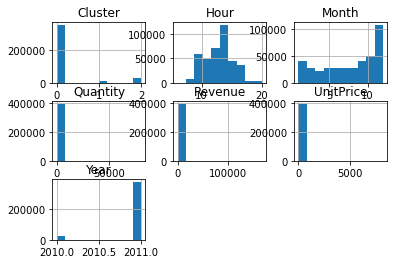

In [94]:
# A quick check of variable distributions.

df.hist()

The following information could be extracted from above histogram distributions:
    Quantity and UnitPrice are highly skewed, while the distribution is so large. As a consequence, revenue (product of Quantity and UnitPrice) exhibits the same pattern. Further investigation is needed on those large data.<br>
   > **Purchases are mostly happened in early afternoons, from 1PM to 215PM, followed by time period from 1145AM to 1PM and then from 9AM to 10AM.** <br>
   > **Most purchasess happeed in holiday seasons, December, November, January and October are when the transaction volumes are high.**

### 3.1.1 Analysis by country

In [95]:
# What are the buying countries?
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Belgium', 'Netherlands',
       'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland',
       'Portugal', 'Italy', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Austria', 'Cyprus', 'Sweden',
       'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [96]:
# Count how many countries in total

print(len(df['Country'].unique()))

37


#### 3.1.1.1 By # of transactions

In [97]:
# Each InvoiceNo is corresponding to one transacton.
df_country_transaction = df['InvoiceNo'].groupby(df['Country']).count().sort_values(ascending = False)
print(df_country_transaction)

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


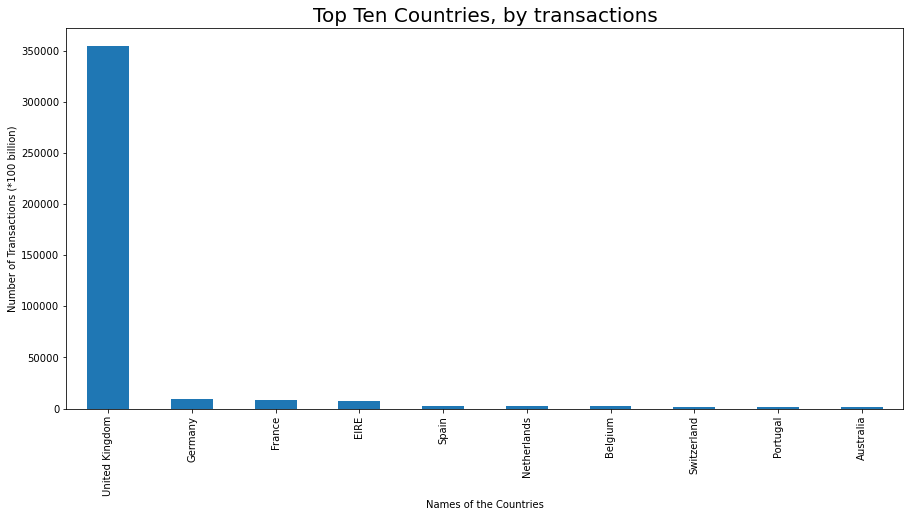

In [98]:
# Top 10 countries with highest transactions  
df_country_transaction.head(10).plot.bar(figsize = (15, 7))

plt.title('Top Ten Countries, by transactions', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Transactions (*100 billion)')
plt.show()

Obviously, UK is the country with largest transactions. We would like to take a closer look at other countries. 

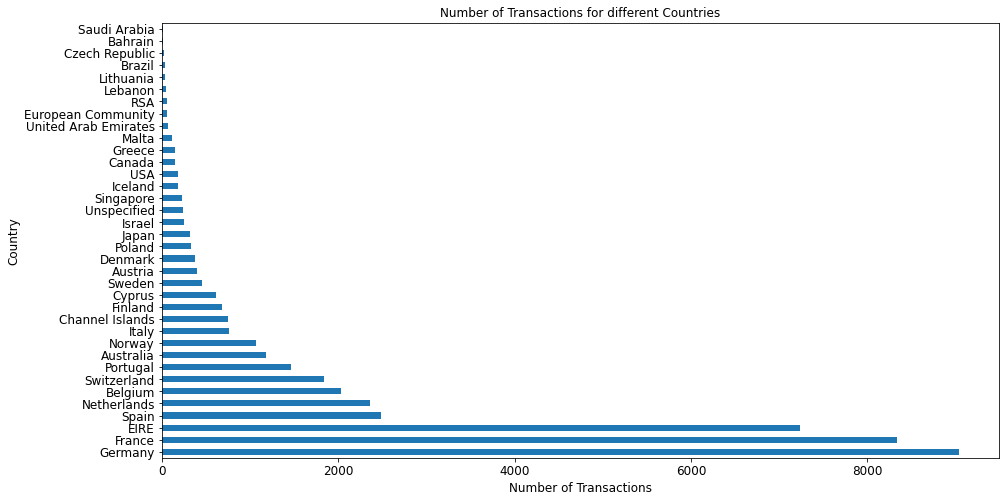

In [99]:
df_country_transaction_woUK = df_country_transaction.drop(['United Kingdom']) # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
df_country_transaction_woUK.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Transactions for different Countries', fontsize=12)
plt.show()

#### 3.1.1.2 By Quantity

In [100]:
df_country_quantity = df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = False)
print(df_country_quantity)

Country
United Kingdom          4256740
Netherlands              200361
EIRE                     140275
Germany                  119261
France                   111471
Australia                 83901
Sweden                    36083
Switzerland               30082
Spain                     27940
Japan                     26016
Belgium                   23237
Norway                    19336
Portugal                  16122
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Israel                     4046
Poland                     3684
Canada                     2763
Iceland                    2458
USA                        2458
Unspecified                1789
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671
Lithuania                   652


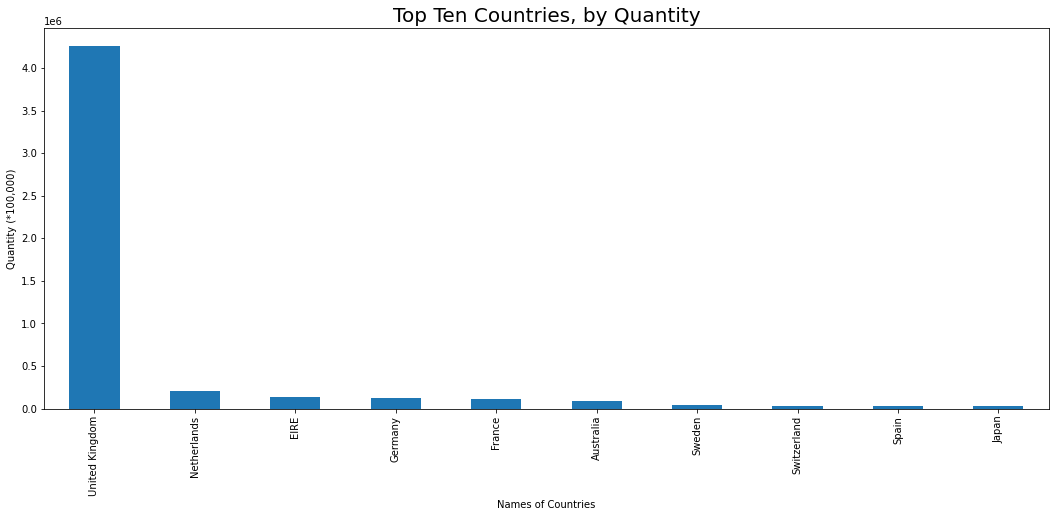

In [101]:
# Top 10 countries with highest Quantity 

df_country_quantity.head(10).plot.bar(figsize = (18, 7))
plt.title('Top Ten Countries, by Quantity', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Quantity (*100,000)')
plt.show()

Let's take a closer look at countries other than UK. 

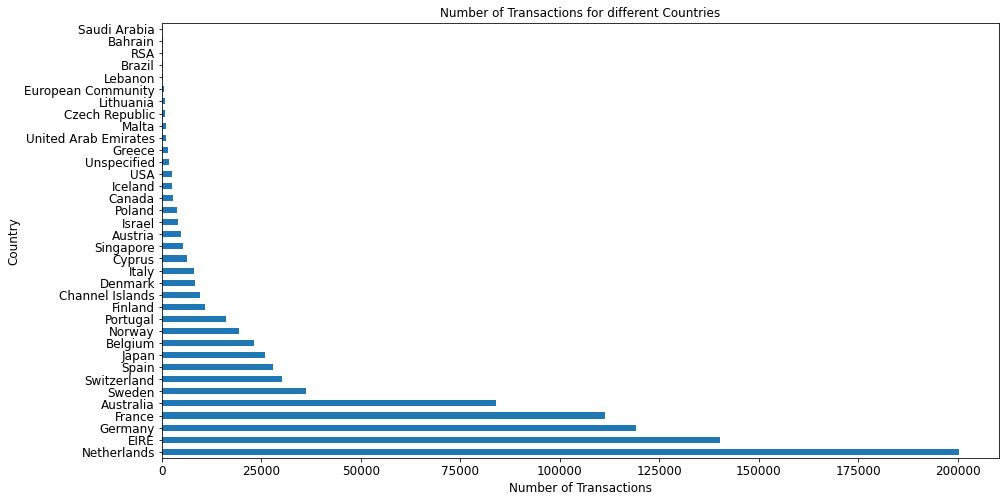

In [102]:
df_country_quantity_woUK = df_country_quantity.drop(['United Kingdom']) # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
df_country_quantity_woUK.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Transactions for different Countries', fontsize=12)
plt.show()

#### 3.1.1.3 By Revenue

In [103]:
df_country_revenue = df['Revenue'].groupby(df['Country']).agg('sum').sort_values(ascending = False)
df_country_revenue

Country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

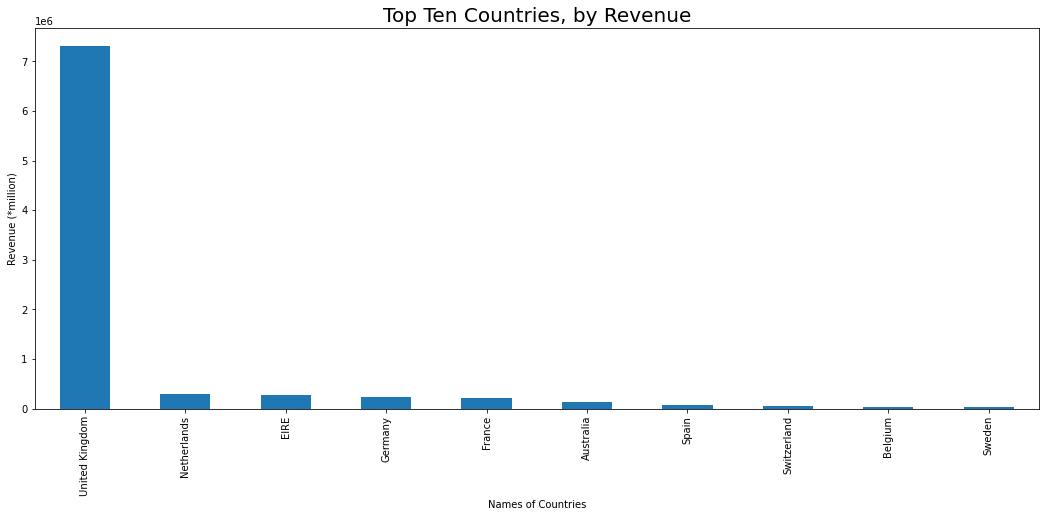

In [104]:
# Top 10 countries, by Revenue 

df_country_revenue.head(10).plot.bar(figsize = (18, 7))
plt.title('Top Ten Countries, by Revenue', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Revenue (*million)')
plt.show()

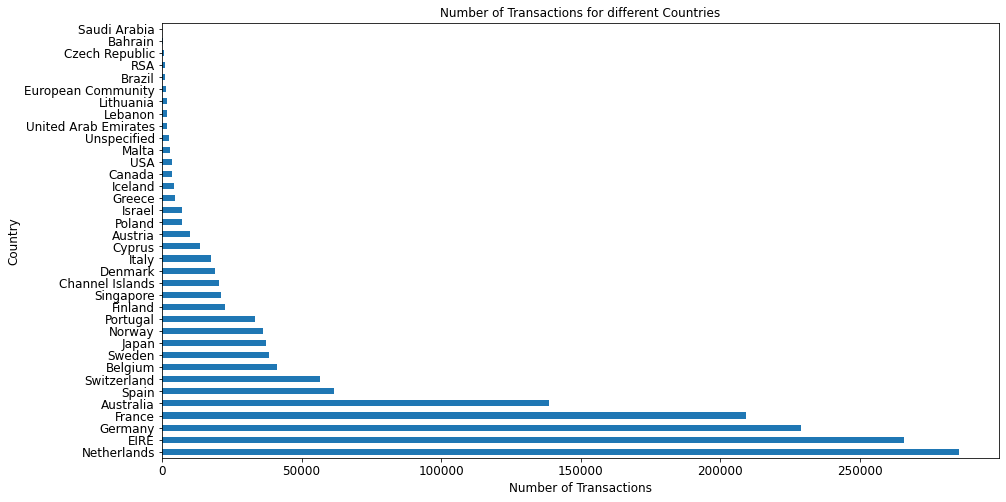

In [105]:
df_country_revenue_woUK = df_country_revenue.drop(['United Kingdom']) # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
df_country_revenue_woUK.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Transactions for different Countries', fontsize=12)
plt.show()

#### 3.1.1.4 Summary - analysis by country

No matter by what standard, **United Kingdom is the largest and predominating market for this retailer**. <br>
In terms of number of transactions, Germany, France, EIRE, Spain, Netherlands, Belgium, and Switzerland are leading countries. <br>
In terms of Quantity and Revenue, Netherlands, EIRE, Germany, France, Austrialia are leading. 


### 3.1.2 Analysis by time

#### 3.1.2.1 Time-based transaction analysis 

In [106]:
# Data frames for plots --- Each InvoiceNo corresponds to one transaction
plot1 = pd.DataFrame(df.groupby(['Month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df.groupby(['Weekday'])['InvoiceNo'].count())
plot3 = pd.DataFrame(df.groupby(['Hour'])['InvoiceNo'].count()).reset_index()

plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

In [107]:
df['Month_year'].value_counts()

2011-11-01    64531
2011-10-01    49554
2011-09-01    40028
2011-05-01    28320
2011-06-01    27185
2011-03-01    27175
2011-08-01    27007
2011-07-01    26825
2010-12-01    26157
2011-04-01    22642
2011-01-01    21229
2011-02-01    19927
2011-12-01    17304
Name: Month_year, dtype: int64

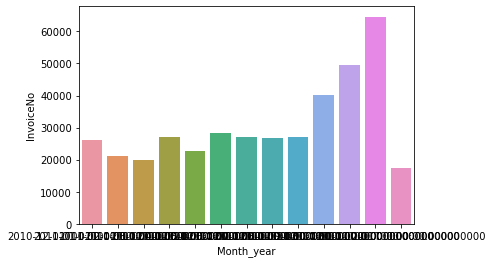

In [108]:
# Transactions in each month
ax = sns.barplot(x="Month_year", y="InvoiceNo", data = plot1)

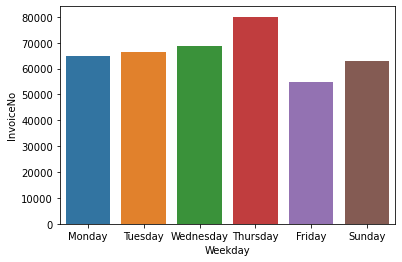

In [109]:
# Transactions in each weekday
ax = sns.barplot(x="Weekday", y="InvoiceNo", data = plot2)

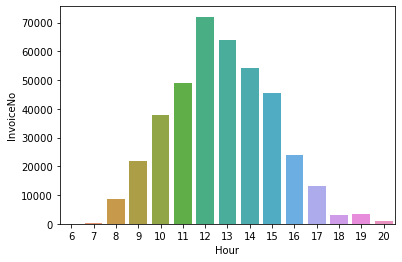

In [110]:
# Transactions in each hour
ax = sns.barplot(x="Hour", y="InvoiceNo", data = plot3)

#### 3.1.2.2 Time-based revenue analysis 

In [111]:
# Data frames for plots
plot4 = pd.DataFrame(df.groupby(['Month_year'])['Revenue'].sum()).reset_index()
plot5 = pd.DataFrame(df.groupby(['Weekday'])['Revenue'].sum())
plot6 = pd.DataFrame(df.groupby(['Hour'])['Revenue'].sum()).reset_index()

plot5 = plot5.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

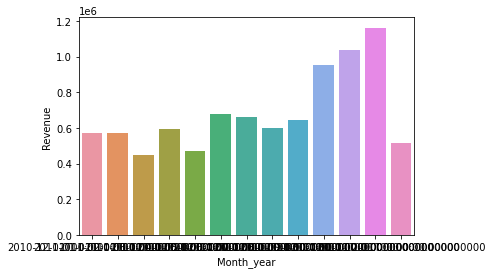

In [112]:
# Revenue in each month
ax = sns.barplot(x = 'Month_year', y='Revenue', data = plot4)

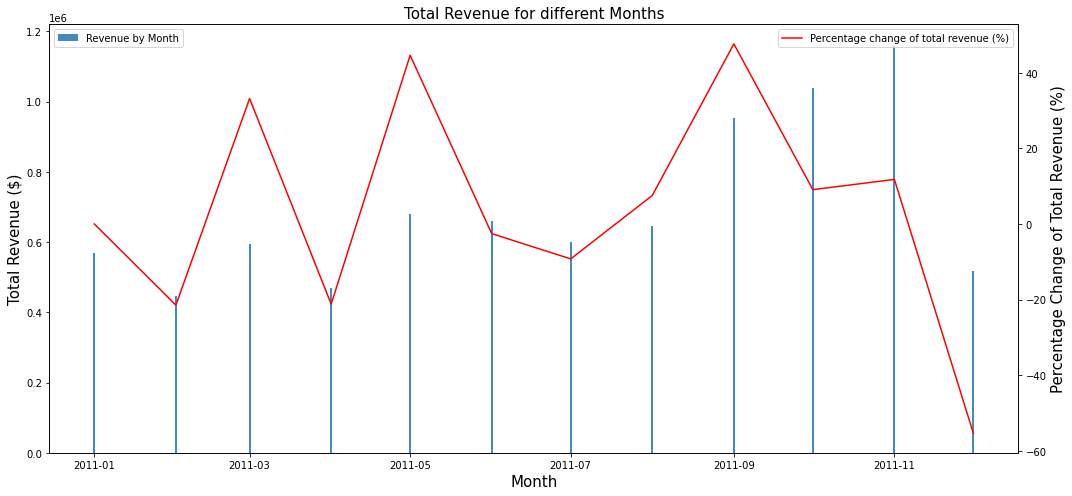

In [113]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Total Revenue ($)',fontsize=15)
ax1.set_title('Total Revenue for different Months',fontsize=15)
ax1.bar(df.groupby(by=['Month_year'])['Revenue'].sum().index.tolist()[1:],
        df.groupby(by=['Month_year'])['Revenue'].sum()[1:],
        alpha=0.85,
        label='Revenue by Month')
#----------------
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage Change of Total Revenue (%)',fontsize=15)
ax2.plot(df.groupby(by=['Month_year'])['Revenue'].sum().index.tolist()[1:], 
         df.groupby(by=['Month_year'])['Revenue'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total revenue (%)',
         color='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

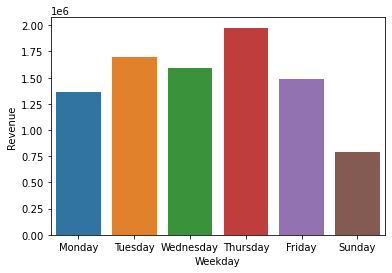

In [114]:
# Revenue in each weekday
ax = sns.barplot(x = 'Weekday', y='Revenue', data = plot5)

# Annotate bar chart with percentage

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
# for i in ax.patches:
 #   totals.append(i.get_height())

# set individual bar lables using above list
# total = sum(totals)

# set individual bar lables using above list
# for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
  #  ax.text(i.get_x()+0.1, i.get_height()+40, \
   #         str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
    #            fontweight='bold', color='red')
# plt.show()

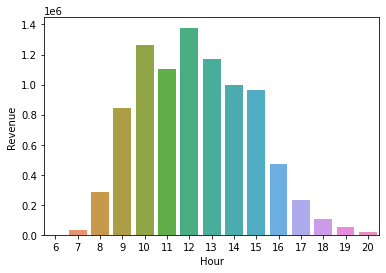

In [115]:
# Revenue in each hour
ax = sns.barplot(x = 'Hour', y='Revenue', data = plot6)

#### 3.1.2.3 Summary - analysis by time 

There are more purchases and revenues made by the end of year. **November, October, and September are the top three months when there are most transactions and revenues.**<br>

In terms of weekdays, **Thursday is the day when there are more transactions and revenues than other days.** There is no transaction on Saturday. Wednesday, Tuesday, Monday, Sunday and Friday are the days with descending transactions. But Tuesday, Wednesday, Friday, Monday and Sunday are the days with descending revenues. 

In terms of hours, **noon is the time when there are more transactions and revenues than any other hours.** 13PM, 14PM 11AM, 15PM, 10AM are the time when there are higher transactions. Wither regarding to revenues, 10AM, 13PM, 11AM, 14PM, 15PM and 9AM are the times when there are more revenues. 

### 3.1.3 Analysis by product

In [116]:
# conda install -c conda-forge wordcloud
# installed already, run the following code to update: 
# $ conda update -n base -c defaults conda

In [117]:
print("Number of unique descriptions: ", len(df['Description'].unique().tolist()))

Number of unique descriptions:  3877


In [118]:
df['Description'] = df['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)

In [119]:
print("Number of unique descriptions: ", len(df['Description'].unique().tolist()))

Number of unique descriptions:  3867


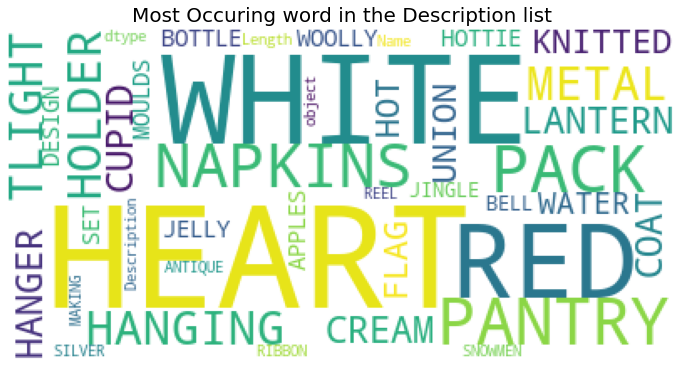

In [120]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [ ]:
# most popular products
df['InvoiceNo'].groupby(df['Description']).agg('sum').sort_values(ascending = False)

In [ ]:
# Products that bring in most revenues
df['Revenue'].groupby(df['Description']).agg('sum').sort_values(ascending = False)

### 3.1.4 Analysis by Customer

#### 3.1.4.1 Analysis by Transaction

In [121]:
df_customer_transaction = df['InvoiceNo'].groupby(df['CustomerID']).count().sort_values(ascending = False)
df_customer_transaction

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
15823       1
15802       1
15753       1
15668       1
12346       1
Name: InvoiceNo, Length: 4338, dtype: int64

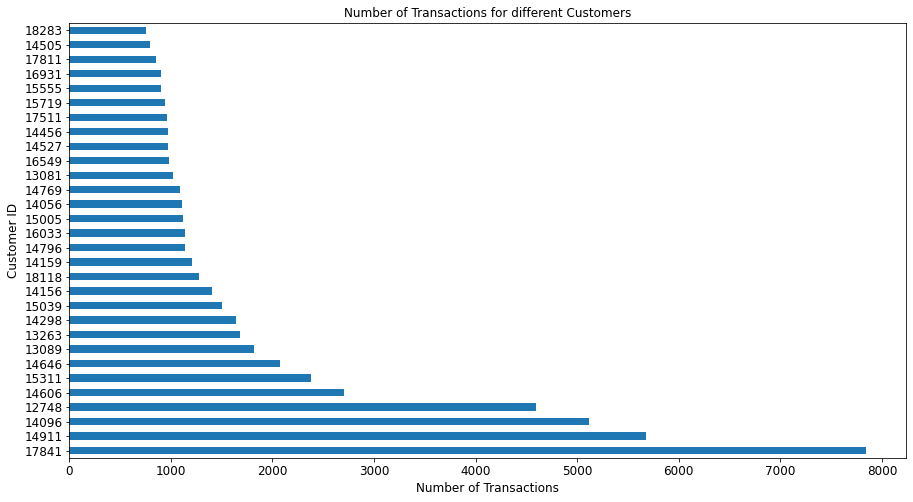

In [122]:
# plot number of orders for top customers

plt.subplots(figsize=(15,8))
df_customer_transaction.head(30).plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Number of Transactions for different Customers', fontsize=12)
plt.show()

#### 3.1.4.2 Customer Analysis by Quantity

In [123]:
df_customer_quantity = df['Quantity'].groupby(df['CustomerID']).agg('sum').sort_values(ascending = False)
df_customer_quantity

CustomerID
14646    196915
16446     80997
14911     80265
12415     77374
12346     74215
          ...  
17846         1
15802         1
15823         1
16742         1
17956         1
Name: Quantity, Length: 4338, dtype: int64

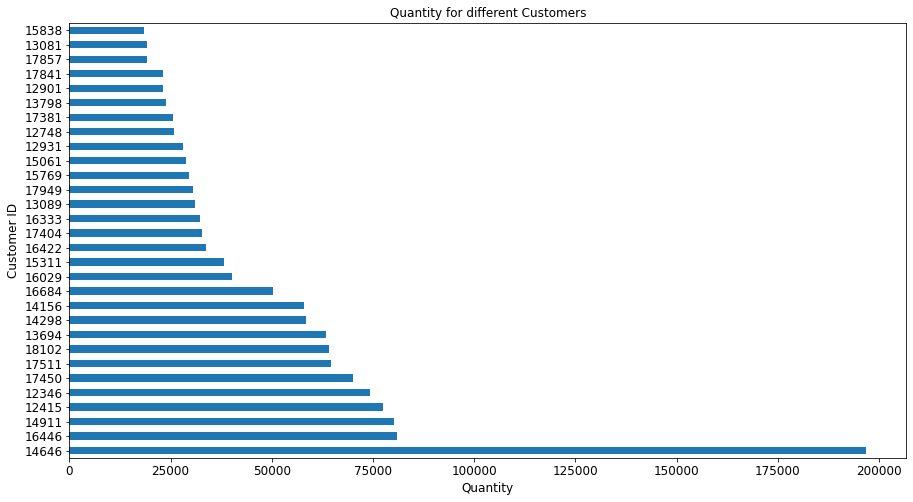

In [124]:
# plot number of orders for top customers

plt.subplots(figsize=(15,8))
df_customer_quantity.head(30).plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Quantity for different Customers', fontsize=12)
plt.show()

#### 3.1.4.3 Customer Analysis by Revenue

In [125]:
df_customer_revenue = df['Revenue'].groupby(df['CustomerID']).agg('sum').sort_values(ascending = False)
df_customer_revenue

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: Revenue, Length: 4338, dtype: float64

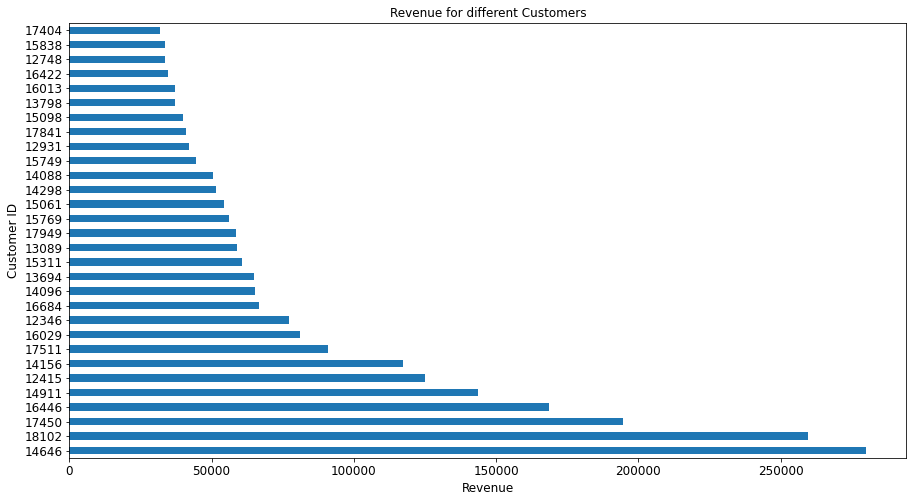

In [126]:
# plot number of orders for top customers

plt.subplots(figsize=(15,8))
df_customer_revenue.head(30).plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Revenue for different Customers', fontsize=12)
plt.show()

#### 3.1.4.4 Customer Analysis by Time

### 3.1.5 RFM analysis for UK customers

In [127]:
df_uk = df[df['Country'] == 'United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue,Cluster
0,536365,85123A,WHITE HANGING HEART TLIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0


In [128]:
print(df_uk['InvoiceDate'].min())
print(df_uk['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [129]:
import datetime as dt
presence = dt.datetime(2011, 12, 10)

Calculate recency, frequency and monetary values:

Recency (R) as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?

Frequency (F) as total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

Monetary (M) as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent? Again limit to last two years – or take all time. Simply total up the money from all transactions to get the M value.

Source: https://www.putler.com/rfm-analysis/

In [130]:
rfm = df_uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Revenue': 'monetary_value'}, inplace=True)
rfm.head()

,recency,frequency,monetary_value
CustomerID,,,
12346,325,1,77183.60
12747,2,103,4196.01
12748,0,4595,33719.73
12749,3,199,4090.88
12820,3,59,942.34


In [131]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [132]:
rfm_segments= rfm

In [133]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [134]:
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [135]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)
rfm_segments.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346,325,1,77183.60,4,4,1,441
12747,2,103,4196.01,1,1,1,111
12748,0,4595,33719.73,1,1,1,111
12749,3,199,4090.88,1,1,1,111
12820,3,59,942.34,1,2,2,122


In [136]:
rfm_segments['RFMClass'].unique()

array(['441', '111', '122', '444', '322', '341', '333', '133', '231',
       '233', '433', '311', '212', '411', '332', '223', '222', '324',
       '443', '321', '312', '422', '343', '344', '211', '423', '112',
       '243', '142', '234', '121', '442', '221', '131', '134', '334',
       '213', '244', '421', '143', '434', '144', '431', '113', '432',
       '132', '331', '242', '342', '424', '323', '123', '232', '224',
       '124', '412', '241', '313', '413', '141', '114'], dtype=object)

In [ ]:

print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")

### 3.2 Cancelled Orders

In [ ]:
# A quick check of variable distributions.

df_cancelled.hist(figsize=(15, 15))

The following information could be extracted from above histogram distributions:
    Quantity and UnitPrice are highly skewed, while the distribution is so large. As a consequence, revenue (product of Quantity and UnitPrice) exhibits the same pattern. Further investigation is needed on those large data.<br>
   > **Cancellations are more evenly distributed than purchases. There timer period with highest cancellations happend around 1-2:15PM, 3:45-5PM and 8:45-10:15AM.** <br>
   > **Most purchasess happeed in holiday seasons and after holiday seasons, November-December, and January-February are when the cancellation volumes are high.**

### 3.2.1 Analysis by country

In [ ]:
# What are the buying countries?
df_cancelled['Country'].unique()

In [ ]:
# Count how many countries in total

print(len(df_cancelled['Country'].unique()))

In [ ]:
df_cancelled['InvoiceNo'] = df_cancelled['InvoiceNo'].str.replace('C', '')

In [ ]:
df_cancelled.head()

#### 3.2.1.1 By # of cancellations

In [ ]:
# Each InvoiceNo is corresponding to one transacton.
df_cancelled['InvoiceNo'].groupby(df_cancelled['Country']).count().sort_values(ascending = False)

In [ ]:
# Top 10 countries with highest transactions  
df_cancelled['InvoiceNo'].groupby(df_cancelled['Country']).count().sort_values(ascending = False).head(5).plot.bar(figsize = (15, 7))

plt.title('Top Ten Countries, by cancellations', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Cancellations')
plt.show()

In [ ]:
# Bottom 10 countries with lowest transactions  
df_cancelled['InvoiceNo'].groupby(df_cancelled['Country']).count().sort_values(ascending = False).tail(10).plot.bar(figsize = (15, 7))

plt.title('Bottom Ten Countries, by cancellations', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Cancellations')
plt.show()

#### 3.1.1.2 By Quantity

In [ ]:
df_cancelled['Quantity'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False)

In [ ]:
# Top 10 countries with highest Quantity 

df_cancelled['Quantity'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False).head(10).plot.bar(figsize = (18, 7))
plt.title('Top Ten Countries, by Cancelled Quantity', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Cancelled Quantity')
plt.show()

In [ ]:
# Bottom 10 countries, byQuantity 

df_cancelled['Quantity'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False).tail(10).plot.bar(figsize = (18, 7))
plt.title('Bottom Ten Countries, by Cancelled Quantity', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Cancelled Quantity')
plt.show()

#### 3.1.1.3 By Revenue

In [ ]:
df_cancelled['Revenue'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False)

In [ ]:
# Top 10 countries, by Revenue 

df_cancelled['Revenue'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False).head(10).plot.bar(figsize = (18, 7))
plt.title('Top Ten Countries, by Cancelled Revenue', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Cancelled Revenue')
plt.show()

In [ ]:
# Bottom 10 countries, by Revenue 

df_cancelled['Revenue'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False).tail(10).plot.bar(figsize = (18, 7))
plt.title('Bottom Ten Countries, by Cancelled Revenue', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Cancelled Revenue')
plt.show()

#### 3.1.1.4 Summary - analysis by country

No matter by what standard, **United Kingdom is the largest and predominating market for this retailer**. <br>
In terms of number of transactions, Germany, France, EIRE, Spain, Netherlands, Belgium, and Switzerland are leading countries. <br>
In terms of Quantity and Revenue, Netherlands, EIRE, Germany, France, Austrialia are leading. 

### 3.1.2 Analysis by time

#### 3.1.2.1 Time-based transaction analysis 

In [ ]:
# Data frames for plots --- Each InvoiceNo corresponds to one transaction
plot1 = pd.DataFrame(df_cancelled.groupby(['Month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df_cancelled.groupby(['Weekday'])['InvoiceNo'].count())
plot3 = pd.DataFrame(df_cancelled.groupby(['Hour'])['InvoiceNo'].count()).reset_index()

plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

In [ ]:
df_cancelled['Month_year'].value_counts()

In [ ]:
# Transactions in each month
ax = sns.barplot(x="Month_year", y="InvoiceNo", data = plot1)

In [ ]:
# Transactions in each weekday
ax = sns.barplot(x="Weekday", y="InvoiceNo", data = plot2)

In [ ]:
# Transactions in each hour
ax = sns.barplot(x="Hour", y="InvoiceNo", data = plot3)

#### 3.2.2.2 Time-based revenue analysis 

In [ ]:
# Data frames for plots
plot4 = pd.DataFrame(df_cancelled.groupby(['Month_year'])['Revenue'].sum()).reset_index()
plot5 = pd.DataFrame(df_cancelled.groupby(['Weekday'])['Revenue'].sum())
plot6 = pd.DataFrame(df_cancelled.groupby(['Hour'])['Revenue'].sum()).reset_index()

plot5 = plot5.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

In [ ]:
# Revenue in each month
ax = sns.barplot(x = 'Month_year', y='Revenue', data = plot4)

In [ ]:
# Revenue in each weekday
ax = sns.barplot(x = 'Weekday', y='Revenue', data = plot5)

In [ ]:
# Revenue in each hour
ax = sns.barplot(x = 'Hour', y='Revenue', data = plot6)

#### 3.2.2.3 Summary - analysis by time 

There are more purchases and revenues made by the end of year. **November, October, and September are the top three months when there are most transactions and revenues.**<br>

In terms of weekdays, **Thursday is the day when there are more transactions and revenues than other days.** There is no transaction on Saturday. Wednesday, Tuesday, Monday, Sunday and Friday are the days with descending transactions. But Tuesday, Wednesday, Friday, Monday and Sunday are the days with descending revenues. 

In terms of hours, **noon is the time when there are more transactions and revenues than any other hours.** 13PM, 14PM 11AM, 15PM, 10AM are the time when there are higher transactions. Wither regarding to revenues, 10AM, 13PM, 11AM, 14PM, 15PM and 9AM are the times when there are more revenues. 

### 3.2.3 Analysis by product

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df_cancelled['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [ ]:
# most cancelled products
df_cancelled['InvoiceNo'].groupby(df_cancelled['Description']).agg('sum').sort_values(ascending = False)

In [ ]:
# Products that bring in most revenues
df_cancelled['Revenue'].groupby(df_cancelled['Description']).agg('sum').sort_values(ascending = False)


In [ ]:
df.head(60)


In [ ]:
df.to_csv('G:\My Drive\Jun\Mechine Learning\Data Science\Capstone Two\Normal Orders.csv')

In [ ]:
df_cancelled.to_csv('G:\My Drive\Jun\Mechine Learning\Data Science\Capstone Two\Cancelled Orders.csv')

## 4. Data pre-processing and Feature Engineering
##### This section prepares data for machine learning application. There are many ways of pre-processing. Here for this case, we will use original data and RFM for clustomer segment. And we will use .... for sales prediction.

In [137]:
# check on original data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue,Cluster
0,536365,85123A,WHITE HANGING HEART TLIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0


In [138]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [ ]:
# Noticed that there are a wide distribution of 

In [139]:
df_pricy = df[df['UnitPrice']>50]
df_pricy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue,Cluster
3811,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,5,2011,Tuesday,2011-05-01,13,8142.75,2
5195,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.00,13705,United Kingdom,12,2010,Wednesday,2010-12-01,10,165.00,0
6474,542349,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2011-01-27 12:10:00,165.00,15513,United Kingdom,1,2011,Thursday,2011-01-01,12,165.00,0
11092,551419,M,Manual,1,2011-04-28 13:51:00,400.00,12748,United Kingdom,4,2011,Thursday,2011-04-01,13,400.00,2
13060,576389,M,Manual,1,2011-11-15 10:05:00,850.50,12748,United Kingdom,11,2011,Tuesday,2011-11-01,10,850.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388742,576782,22826,LOVE SEAT ANTIQUE WHITE METAL,4,2011-11-16 13:36:00,85.00,17500,United Kingdom,11,2011,Wednesday,2011-11-01,13,340.00,0
388743,578042,22826,LOVE SEAT ANTIQUE WHITE METAL,6,2011-11-22 14:25:00,85.00,17500,United Kingdom,11,2011,Tuesday,2011-11-01,14,510.00,0
390932,576512,22823,CHEST NATURAL WOOD 20 DRAWERS,4,2011-11-15 12:09:00,110.00,15524,United Kingdom,11,2011,Tuesday,2011-11-01,12,440.00,0
391396,576635,22828,REGENCY MIRROR WITH SHUTTERS,2,2011-11-16 09:32:00,145.00,15269,United Kingdom,11,2011,Wednesday,2011-11-01,9,290.00,0


In [140]:
df_volume = df[df['Quantity']>500]
df_volume

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue,Cluster
3749,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029,United Kingdom,12,2010,Thursday,2010-12-01,10,2256.00,2
3778,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029,United Kingdom,2,2011,Friday,2011-02-01,11,2256.00,2
3887,563563,20971,PINK BLUE FELT CRAFT TRINKET BOX,576,2011-08-17 14:03:00,1.06,16029,United Kingdom,8,2011,Wednesday,2011-08-01,14,610.56,2
3934,570094,20971,PINK BLUE FELT CRAFT TRINKET BOX,1296,2011-10-07 11:56:00,1.06,16029,United Kingdom,10,2011,Friday,2011-10-01,11,1373.76,2
3936,570094,22273,FELTCRAFT DOLL MOLLY,720,2011-10-07 11:56:00,2.55,16029,United Kingdom,10,2011,Friday,2011-10-01,11,1836.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397606,581105,23498,CLASSIC BICYCLE CLIPS,620,2011-12-07 12:14:00,1.38,16000,United Kingdom,12,2011,Wednesday,2011-12-01,12,855.60,0
397607,581105,22961,JAM MAKING SET PRINTED,620,2011-12-07 12:14:00,1.38,16000,United Kingdom,12,2011,Wednesday,2011-12-01,12,855.60,0
397608,581105,23552,BICYCLE PUNCTURE REPAIR KIT,620,2011-12-07 12:14:00,1.86,16000,United Kingdom,12,2011,Wednesday,2011-12-01,12,1153.20,0
397609,581107,23461,SWEETHEART BIRD HOUSE,620,2011-12-07 12:15:00,3.30,16000,United Kingdom,12,2011,Wednesday,2011-12-01,12,2046.00,0


### RFM

In [165]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Revenue': 'monetary_value'}, inplace=True)
rfm.head()


,recency,frequency,monetary_value
CustomerID,,,
12346,325,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


In [142]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [143]:
rfm_segments= rfm

In [144]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [145]:
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [146]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)
rfm_segments.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346,325,1,77183.60,4,4,1,441
12347,2,182,4310.00,1,1,1,111
12348,75,31,1797.24,3,3,1,331
12349,18,73,1757.55,2,2,1,221
12350,310,17,334.40,4,4,3,443


In [147]:
rfm_segments['RFMClass'].unique()

array(['441', '111', '331', '221', '443', '444', '422', '211', '132',
       '311', '333', '122', '433', '144', '322', '232', '143', '332',
       '121', '421', '233', '223', '222', '243', '432', '431', '244',
       '343', '133', '341', '321', '334', '342', '411', '434', '213',
       '131', '344', '242', '312', '123', '313', '442', '141', '231',
       '212', '324', '412', '423', '112', '142', '234', '134', '113',
       '424', '323', '224', '124', '241', '413', '114'], dtype=object)

In [148]:

print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")

Champions:  440 ( 10.14 %)
Loyal Customers:  1080 ( 24.9 %)
Big Spenders:  1085 ( 25.01 %)
About to Sleep:  169 ( 3.9 %)
Lost Customers:  385 ( 8.88 %)


In [149]:
df_rfm = pd.concat([df, rfm], axis=1)
df_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,...,Hour,Revenue,Cluster,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,536365,85123A,WHITE HANGING HEART TLIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,12.0,2010.0,...,8.0,15.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,12.0,2010.0,...,8.0,20.34,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,12.0,2010.0,...,8.0,22.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,12.0,2010.0,...,8.0,20.34,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,12.0,2010.0,...,8.0,20.34,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ML on  RFM data

In [150]:
# feature scaling

scaler = StandardScaler()
rfm = scaler.fit_transform(rfm)

for n_clusters = range(2, 11), silhouette score is [0.3983746600480252, 0.40678413941708597, 0.3752876255310952, 0.38071310632195277, 0.3808822792809314, 0.3475591392943826, 0.33435624895647026, 0.3462087262435367, 0.33689787619216066])


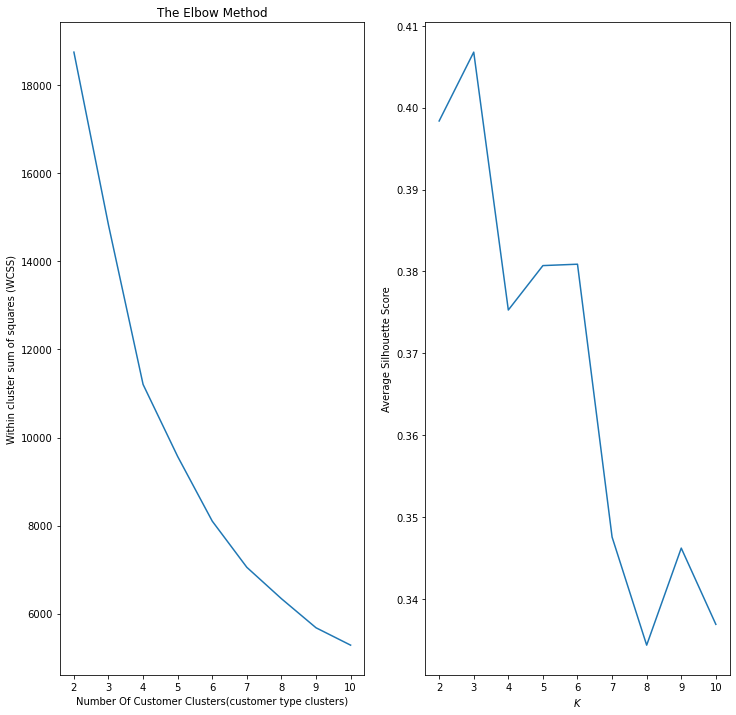

In [154]:
ks = range(2,11)
wcss = []
score = []

for i in ks: #From 2-11 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, max_iter=300,n_init=10) #init='k-means++'
    kmeans.fit(rfm)
    wcss.append(kmeans.inertia_)
    
    preds = kmeans.predict(rfm)
    score.append(silhouette_score(rfm, preds))
plt.subplot(1, 2, 1)
plt.plot(ks , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('Within cluster sum of squares (WCSS)')

print("for n_clusters = {}, silhouette score is {})".format(ks, score))
plt.subplot(1, 2, 2)
plt.plot(ks, score)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

plt.show()

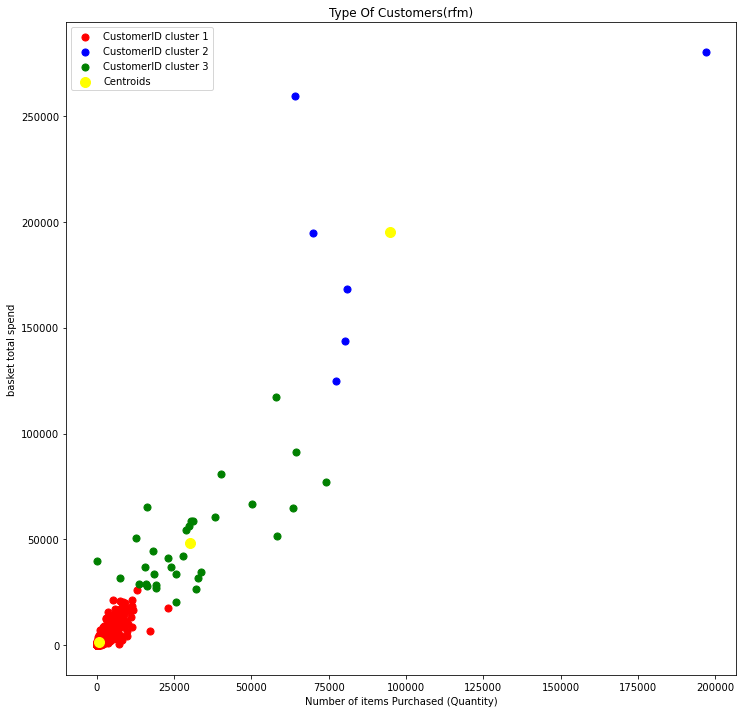

In [152]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'CustomerID cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'CustomerID cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'CustomerID cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(rfm)')
plt.xlabel('Number of items Purchased (Quantity)')
plt.ylabel('basket total spend')
plt.legend()
plt.show()

AttributeError: module 'numpy' has no attribute 'to_array'

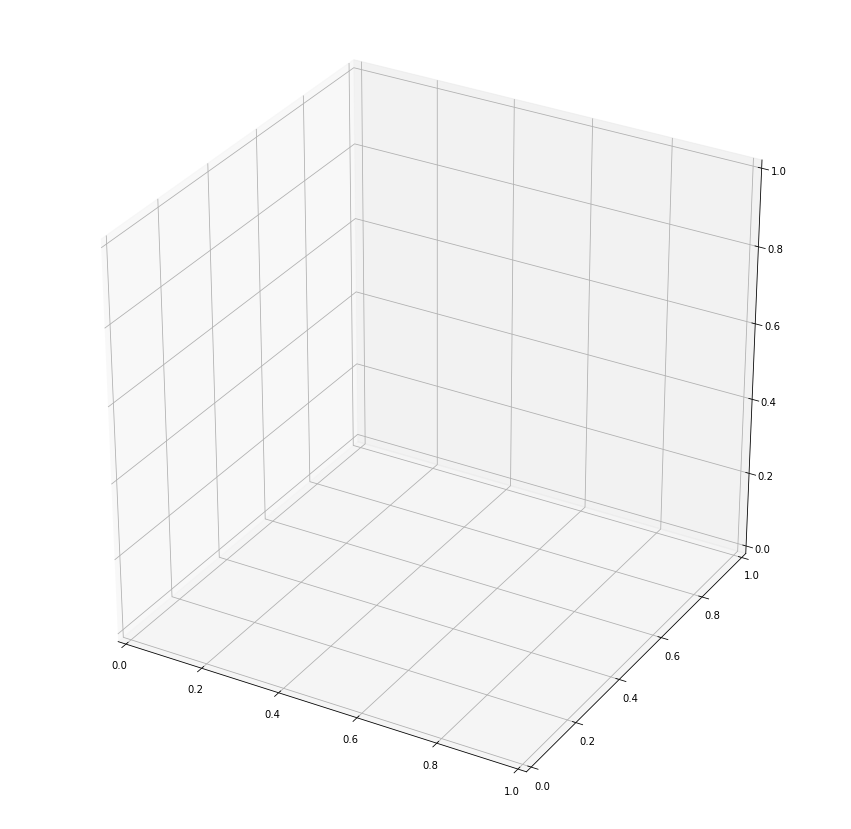

In [161]:
#plotting all datapoints with respect to cluster
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
#datapoints
xd = np.to_array(rfm['recency'])
yd = np.to_array(rfm['frequency'])
zd = np.to_array(int(rfm['monetary_value']))

#creating the scatterplot
ax.scatter3D(xd, yd, zd, alpha=0.5, s=size)
ax.set(xlabel='recency', ylabel='frequency', zlabel='monetary_value')
#plot legend for cluster colors
#legend_items = {'0':'blue', '1':'red', '2':'green'}
#itemlist = []
#for itemkey in legend_items:
 #   patch = mpatches.Patch(color=legend_items[itemkey], label=itemkey)
  #  itemlist.append(patch)#
#plt.legend(handles=itemlist, title='Cluster', fancybox=True, loc=6)
plt.suptitle('Datapoints and Clusters', fontsize = 15, y = 0.90)
plt.show()

#### Feature engineering on RFM data

In [166]:
rfm.corr()

,recency,frequency,monetary_value
recency,1.000000,-0.206180,-0.122241
frequency,-0.206180,1.000000,0.422129
monetary_value,-0.122241,0.422129,1.000000


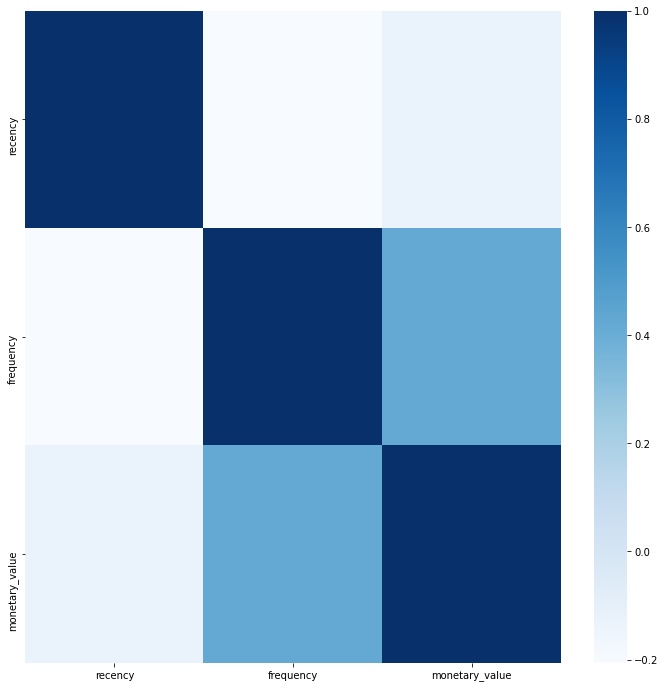

In [167]:
sns.heatmap(rfm.corr(), cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A03F0DEB0>,
      dtype=object)

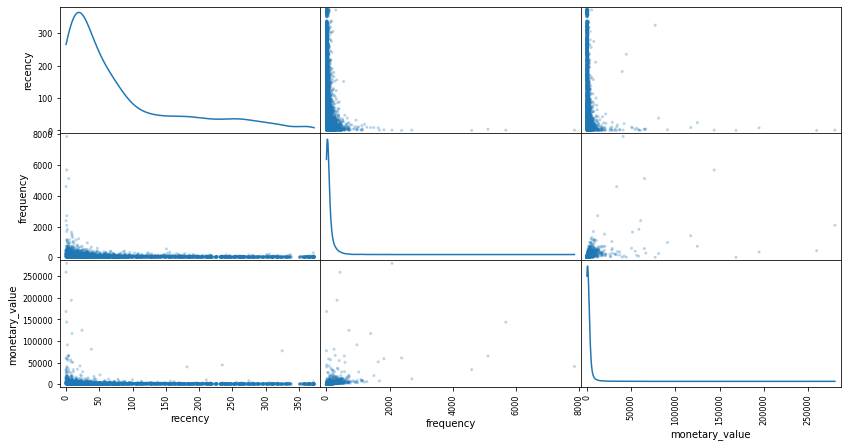

In [169]:
from pandas.plotting import scatter_matrix
# to get a better understanding of the dataset, we make a scatter matrix.
scatter_matrix(rfm, alpha=0.3, figsize=(14,7), diagonal='kde')

#### Noticed that all three variables are distributed skewedly. We will normalize the data before clustering.

In [172]:
rfm_r_log = np.log(rfm['recency']+0.01) # log(0) is undefined
rfm_f_log = np.log(rfm['frequency'])
rfm_m_log = np.log(rfm['monetary_value']+0.01)

In [174]:
rfm_log = pd.DataFrame({'Recency':rfm_r_log, 'Frequency':rfm_f_log, 'Monetary_value':rfm_m_log})
rfm_log.head()

,Recency,Frequency,Monetary_value
CustomerID,,,
12346,5.783856,0.000000,11.253942
12347,0.698135,5.204007,8.368696
12348,4.317621,3.433987,7.494013
12349,2.890927,4.290459,7.471682
12350,5.736605,2.833213,5.812368


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A04F693A0>,
      dtype=object)

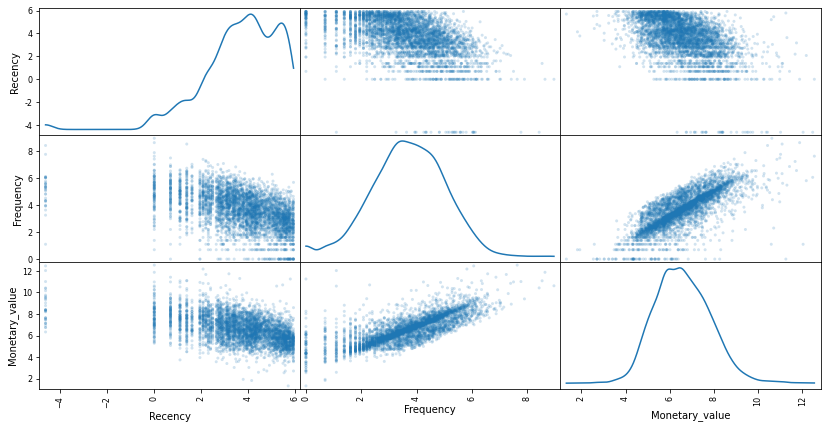

In [175]:
scatter_matrix(rfm_log, alpha=0.2, figsize=(14,7), diagonal = 'kde')

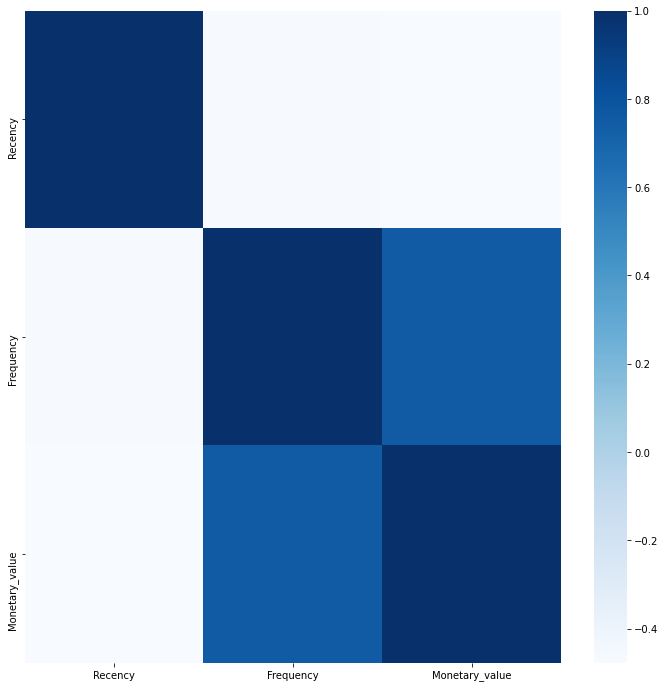

In [176]:
sns.heatmap(rfm_log.corr(), cmap='Blues')

for n_clusters = range(2, 11), silhouette score is [0.393227722699965, 0.30917607867779046, 0.30257864888882463, 0.2873939617832462, 0.2835086313170158, 0.28728360793176155, 0.2696111654195986, 0.2720939955665977, 0.2654350557686667])


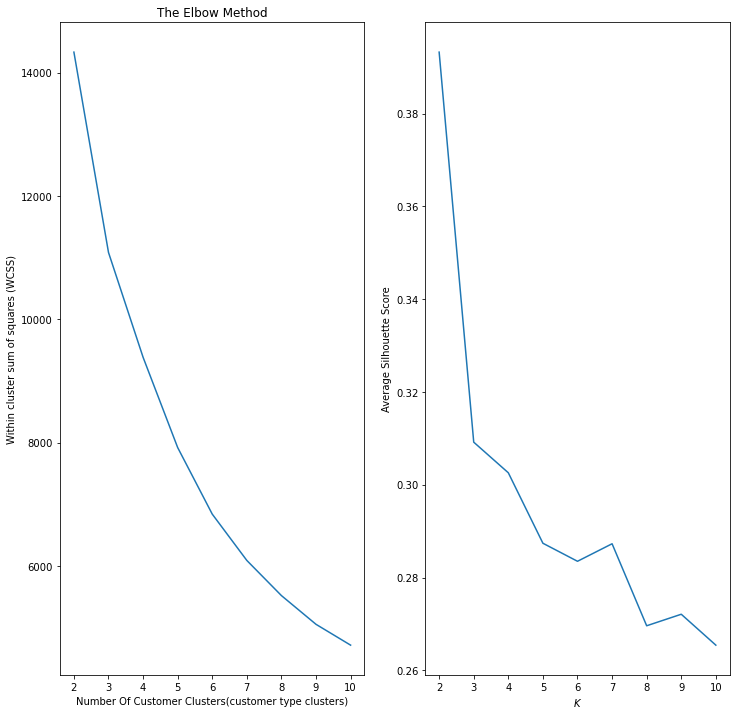

In [178]:
ks = range(2,11)
wcss = []
score = []

for i in ks: #From 2-10 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, max_iter=300, init='k-means++', n_init=10) #init = 'k-means++'
    kmeans.fit(rfm_log)
    wcss.append(kmeans.inertia_)
    
    preds = kmeans.predict(rfm_log)
    score.append(silhouette_score(rfm_log, preds))
plt.subplot(1, 2, 1)
plt.plot(ks , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('Within cluster sum of squares (WCSS)')

print("for n_clusters = {}, silhouette score is {})".format(ks, score))
plt.subplot(1, 2, 2)
plt.plot(ks, score)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

plt.show()

In [180]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2) #init = 'k-means++'
y_kmeans = kmeans.fit_predict(rfm_log)

# Visualising the clusters
plt.scatter(rfm_log[y_kmeans == 0, 1], rfm_log[y_kmeans == 0, 0], s = 50, c = 'red', label = 'CustomerID cluster 1')
plt.scatter(rfm_log[y_kmeans == 1, 1], rfm_log[y_kmeans == 1, 0], s = 50, c = 'blue', label = 'CustomerID cluster 2')
#plt.scatter(rfm_log[y_kmeans == 2, 1], rfm_log[y_kmeans == 2, 0], s = 50, c = 'green', label = 'CustomerID cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('revenue')
plt.ylabel('Quantity')
plt.xlim(0, 350000)
plt.ylim(0, 250000)
plt.legend()
plt.show()

TypeError: '(array([ True, False,  True, ...,  True, False, False]), 1)' is an invalid key

TypeError: '(array([False,  True, False, ..., False,  True,  True]), 0)' is an invalid key

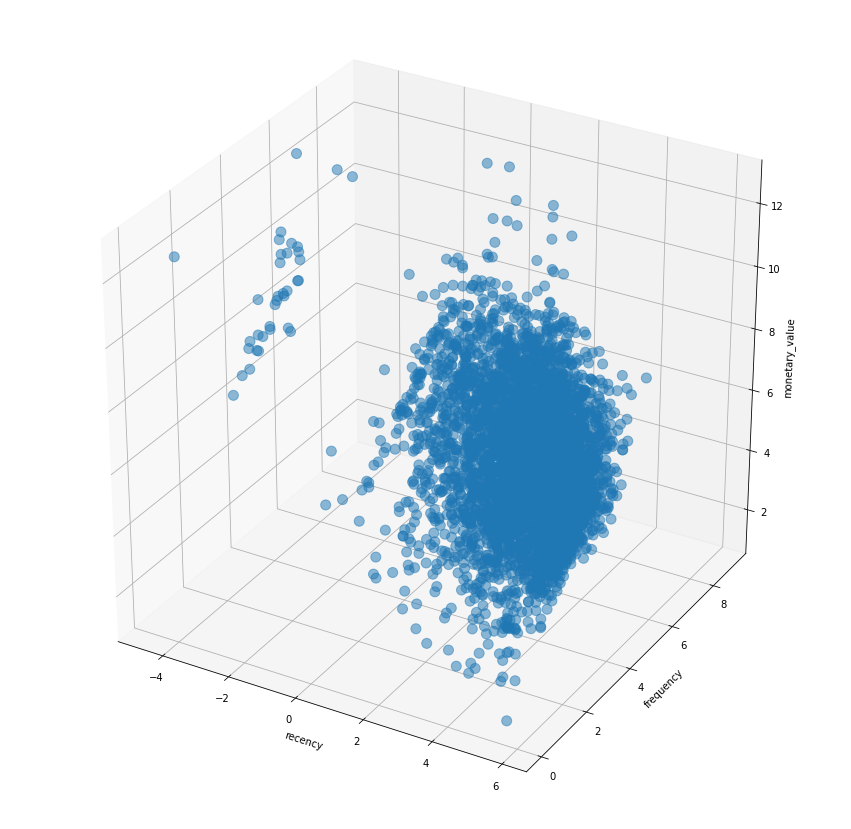

In [190]:
#plt.legend()


# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2) #init = 'k-means++'
y_kmeans = kmeans.fit_predict(rfm_log)
#plotting all datapoints with respect to cluster
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
#creating the scatterplot
ax.scatter3D(rfm_log['Recency'], rfm_log['Frequency'], rfm_log['Monetary_value'], alpha=0.5, s=100)
ax.set(xlabel='recency', ylabel='frequency', zlabel='monetary_value')
# Visualising the clusters
ax.scatter3D(rfm_log[y_kmeans == 0, 0], rfm_log[y_kmeans == 0, 1], rfm_log[y_means == 0, 2], s = 50, c = 'red', label = 'CustomerID cluster 1')
ax.scatter3D(rfm_log[y_kmeans == 1, 0], rfm_log[y_kmeans == 1, 1], rfm_log[y_means == 1, 2], s = 50, c = 'blue', label = 'CustomerID cluster 2')
#plt.scatter(rfm_log[y_kmeans == 2, 1], rfm_log[y_kmeans == 2, 0], s = 50, c = 'green', label = 'CustomerID cluster 3')
ax.scatter3D(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

#plot legend for cluster colors
#legend_items = {'0':'blue', '1':'red', '2':'green'}
#itemlist = []
#for itemkey in legend_items:
 #   patch = mpatches.Patch(color=legend_items[itemkey], label=itemkey)
  #  itemlist.append(patch)#
#plt.legend(handles=itemlist, title='Cluster', fancybox=True, loc=6)
plt.title('Datapoints and Clusters', fontsize = 15, y = 0.90)
plt.show()

In [192]:
#What is the number of customers in each cluster?
pd.DataFrame(pd.Series(y_kmeans).value_counts(), columns=['Number of Customers']).T

,1,0
Number of Customers,2540,1798


### Get dummies --- StockCode is categorical -- tried, not working.

# 4. Machine Learning Applications

### 4.1 Customer Segmentation and Clustering

In [ ]:
!conda install -c gafortiby kmodes

In [17]:
#importing necessary libraries and the dataset
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
#from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline

# CleanDataset = r'../Cleaned-Dataset/OnlineRetail_Cleaned.csv'
# Data_Cleaned = pd.read_csv(CleanDataset, index_col = 'InvoiceDate')
# Data_Cleaned.index = pd.to_datetime(Data_Cleaned.index, format = '%Y-%m-%d %H:%M', box = False)

In [18]:
# import packages

# import missingno as msno
from sklearn import metrics
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pickle
from collections import Counter

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# from altair import Chart, X, Y, Axis, SortField

In [19]:
df_customer = df.groupby('CustomerID')
df_customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713,Germany,12,2011,Friday,2011-12-01,12,54.00
541769,581578,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713,Germany,12,2011,Friday,2011-12-01,12,30.00
541770,581578,21122,SET/10 PINK POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713,Germany,12,2011,Friday,2011-12-01,12,30.00
541771,581578,21121,SET/10 RED POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713,Germany,12,2011,Friday,2011-12-01,12,30.00


In [44]:
df_customer.count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,Year,Weekday,Month_year,Hour,Revenue
CustomerID,,,,,,,,,,,,,
12346,1,1,1,1,1,1,1,1,1,1,1,1,1
12347,182,182,182,182,182,182,182,182,182,182,182,182,182
12348,31,31,31,31,31,31,31,31,31,31,31,31,31
12349,73,73,73,73,73,73,73,73,73,73,73,73,73
12350,17,17,17,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,10,10,10,10,10,10,10,10,10,10,10,10,10
18281,7,7,7,7,7,7,7,7,7,7,7,7,7
18282,12,12,12,12,12,12,12,12,12,12,12,12,12


In [20]:
df_customer_cluster = pd.DataFrame(columns=['CustomerID', 'Quantity', 'Revenue', 'AvgUnitPrice', 'TransactionNo', 'ProductVariety'])

count = 0
for k,v in (df_customer):
    df_customer_cluster.loc[count] = [k, v['Quantity'].sum(), v['Revenue'].sum(), v['UnitPrice'].mean(),  v['InvoiceNo'].nunique(), v['Description'].nunique()]
    count+=1

df_customer_cluster.head()

,CustomerID,Quantity,Revenue,AvgUnitPrice,TransactionNo,ProductVariety
0,12346,74215,77183.60,1.040000,1,1
1,12347,2458,4310.00,2.644011,7,103
2,12348,2341,1797.24,5.764839,4,22
3,12349,631,1757.55,8.289041,1,73
4,12350,197,334.40,3.841176,1,17


In [42]:
X = df_customer_cluster.iloc[:, 1:].values
X

array([[74215, 77183.6, 1.04, 1, 1],
       [2458, 4310.000000000001, 2.644010989010989, 7, 103],
       [2341, 1797.24, 5.764838709677418, 4, 22],
       ...,
       [103, 178.05, 5.199166666666668, 2, 12],
       [1397, 2094.88, 1.6149867724867761, 16, 272],
       [1586, 1837.2800000000002, 1.4935714285714285, 3, 59]],
      dtype=object)

In [43]:
len(X)

4338

In [22]:
# feature scaling

scaler = StandardScaler()
X = scaler.fit_transform(X)

for n_clusters = range(2, 11), silhouette score is [0.944295110375343, 0.9448625016273194, 0.6755294292942464, 0.6684189356693623, 0.6519282253353389, 0.5484854402732239, 0.5759686651421648, 0.5749372670900713, 0.5623398950206586])


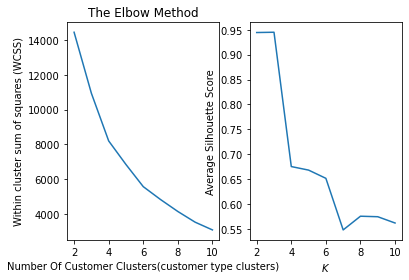

In [23]:
from sklearn.metrics import silhouette_score, silhouette_samples

ks = range(2,11)
wcss = []
score = []

for i in ks: #From 2-10 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, max_iter=300,n_init=10) #init = 'k-means++'
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    preds = kmeans.predict(X)
    score.append(silhouette_score(X, preds))
plt.subplot(1, 2, 1)
plt.plot(ks , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('Within cluster sum of squares (WCSS)')

print("for n_clusters = {}, silhouette score is {})".format(ks, score))
plt.subplot(1, 2, 2)
plt.plot(ks, score)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

plt.show()

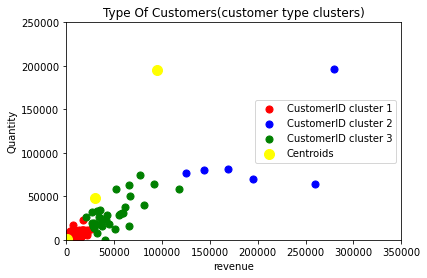

In [49]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3) #init = 'k-means++'
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 0], s = 50, c = 'red', label = 'CustomerID cluster 1')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 0], s = 50, c = 'blue', label = 'CustomerID cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 0], s = 50, c = 'green', label = 'CustomerID cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('revenue')
plt.ylabel('Quantity')
plt.xlim(0, 350000)
plt.ylim(0, 250000)
plt.legend()
plt.show()

In [50]:
df_customer_cluster['cluster'] = y_kmeans
df_customer_cluster.head()

,CustomerID,Quantity,Revenue,AvgUnitPrice,TransactionNo,ProductVariety,cluster
0,12346,74215,77183.60,1.040000,1,1,2
1,12347,2458,4310.00,2.644011,7,103,0
2,12348,2341,1797.24,5.764839,4,22,0
3,12349,631,1757.55,8.289041,1,73,0
4,12350,197,334.40,3.841176,1,17,0


In [54]:
df_cluster = pd.DataFrame({'CustomerID':df_customer_cluster['CustomerID'], 'Cluster': y_kmeans})

In [56]:
df_customer = pd.concat((df_customer, df_cluster),axis=1)
df_customer.shape
df_customer.head()

TypeError: cannot concatenate object of type '<class 'pandas.core.groupby.generic.DataFrameGroupBy'>'; only Series and DataFrame objs are valid

In [69]:
df = pd.merge(df, df_cluster,on = 'CustomerID')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0


In [84]:
df_cluster1 = df[df['Cluster'] == 0]
df_cluster2 = df[df['Cluster'] == 1]
df_cluster3 = df[df['Cluster'] == 2]

In [85]:
df_cluster1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0


cluster 1:


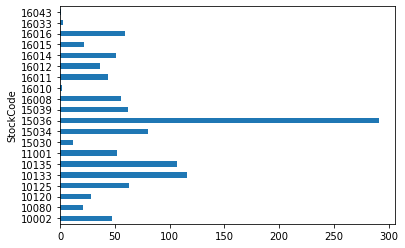

In [89]:
print("cluster 1:")
df_cluster1.groupby('StockCode')['Quantity'].count().head(20).plot(kind="barh")

cluster 2:


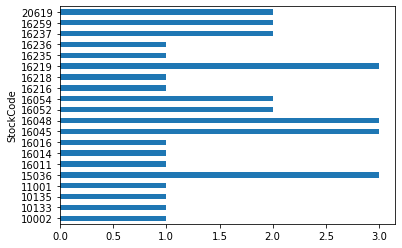

In [90]:
print("cluster 2:")
df_cluster2.groupby('StockCode')['Quantity'].count().head(20).plot(kind="barh")

cluster 3:


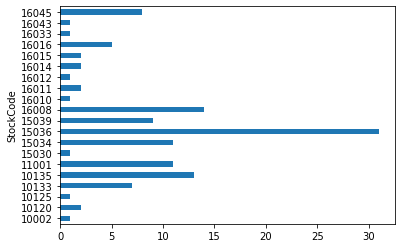

In [91]:
print("cluster 3:")
df_cluster3.groupby('StockCode')['Quantity'].count().head(20).plot(kind="barh")

### 4.2 Time Series Analysis - Predicting Sales Revenues

In [163]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.model_selection import  cross_val_score
# from sklearn.externals import joblib #for saving the trained model

In [218]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue,Cluster,Day,Day_Month_year,Day_Month_Year
0,536365,85123A,WHITE HANGING HEART TLIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30,0,1,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0,1,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00,0,1,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0,1,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,0,1,2010-12-01,2010-12-01


In [220]:
df_ts = pd.DataFrame(df.groupby(['Day_Month_Year'])['Revenue'].sum()).reset_index()
df_ts.head()

,Day_Month_Year,Revenue
0,2010-12-01,46376.49
1,2010-12-02,47316.53
2,2010-12-03,23921.71
3,2010-12-05,31771.60
4,2010-12-06,31215.64


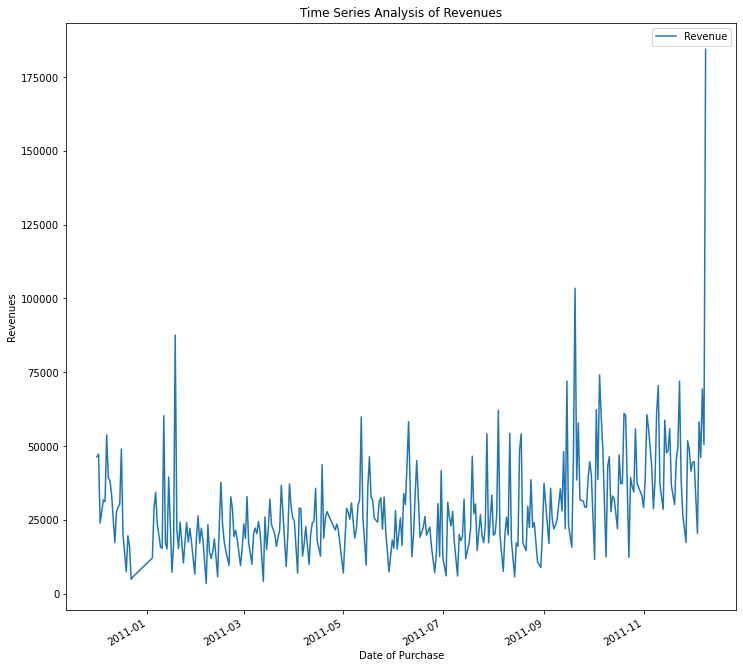

In [221]:
df_ts.plot(x='Day_Month_Year', y='Revenue')
plt.title("Time Series Analysis of Revenues")
plt.xlabel("Date of Purchase")
plt.ylabel("Revenues")
plt.show()

In [225]:
# train-test split
df_ts_train = df_ts[df_ts.Day_Month_Year<'2011-11-01']
df_ts_test = df_ts[df_ts.Day_Month_Year>='2011-11-01']

In [226]:
df_ts_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 270
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Day_Month_Year  271 non-null    datetime64[ns]
 1   Revenue         271 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 KB


In [227]:
df_ts_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 271 to 304
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Day_Month_Year  34 non-null     datetime64[ns]
 1   Revenue         34 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 816.0 bytes
